# Lab 4 - (Stochastic) Gradient Descent and Linear Regression
The goal of this lab is to deepen you understanding of gradient descent and linear regression.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Task 1: Multiple Linear Regression to Predict House Price

In [2]:
# Load data for linear regression
housing = pd.read_csv('Housing.csv')
# Remove rows with empty fields
housing = housing.dropna()
print(housing.shape)

(545, 13)


In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


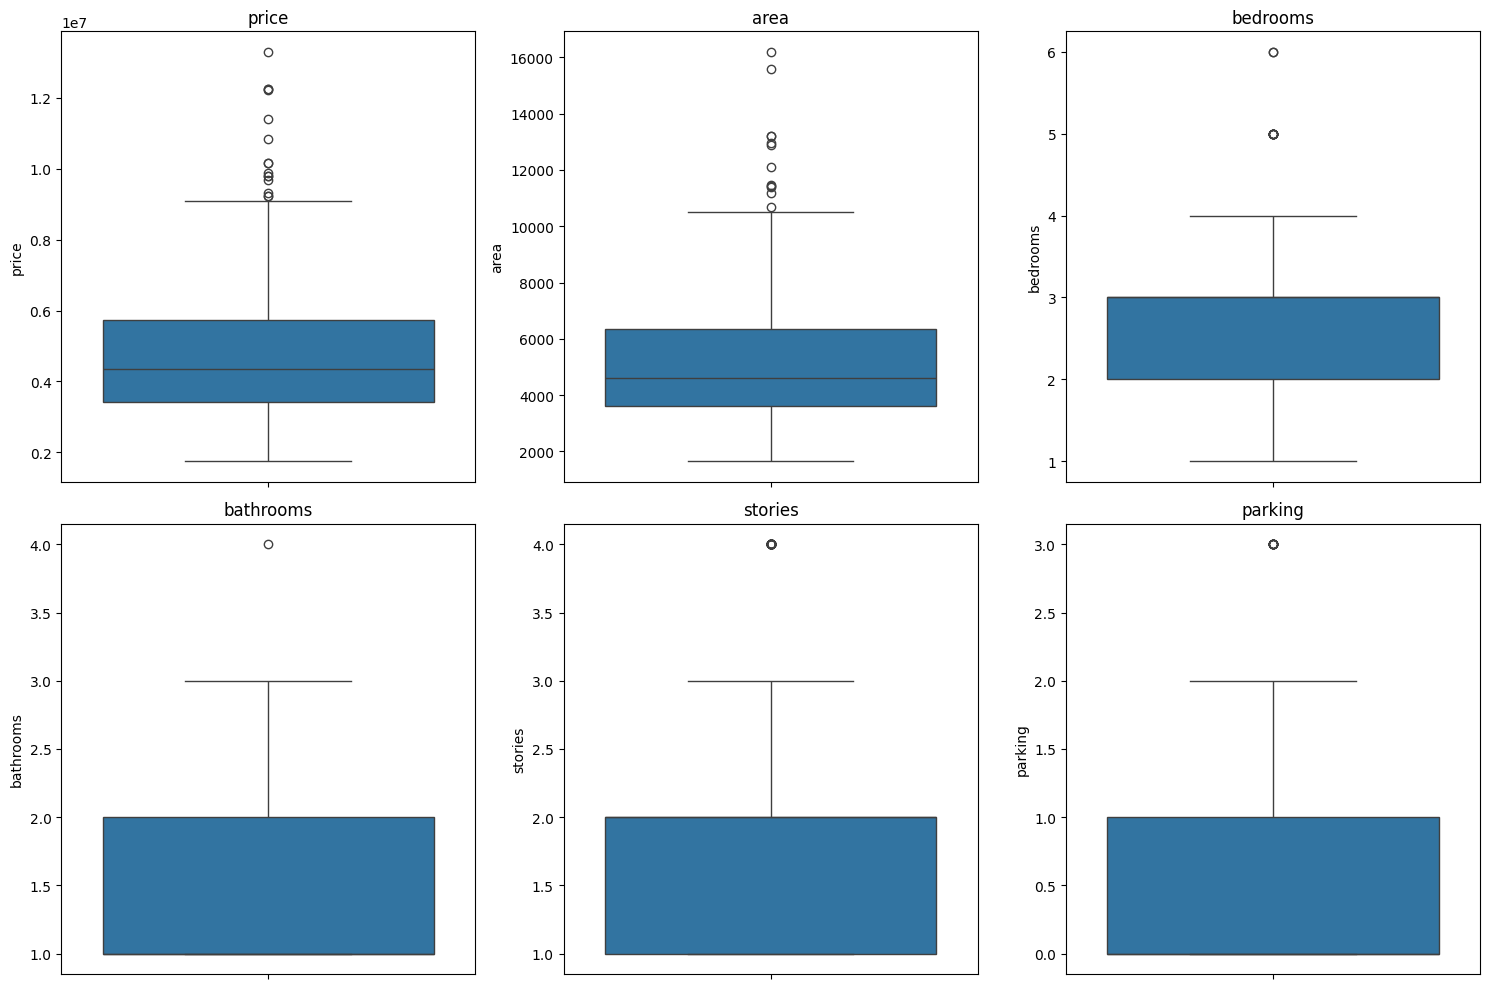

In [4]:
# Examine price, area, bedrooms, bathrooms, stories, and parking to check if any outlier is present. 
# Remove the outliers from the data. (Hint: We can remove the outliers using a Boolean mask. 

# Create box plots to visualize outliers
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=housing[col])
    plt.title(col)
plt.tight_layout()
plt.show()



In [5]:
# Calculate IQR and bounds for each numeric column
outlier_mask = pd.Series(True, index=housing.index)
for col in numeric_cols:
    Q1 = housing[col].quantile(0.25)
    Q3 = housing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update mask to exclude outliers
    outlier_mask = outlier_mask & (housing[col] >= lower_bound) & (housing[col] <= upper_bound)


Original shape: (545, 13)
Shape after removing outliers: (463, 13)


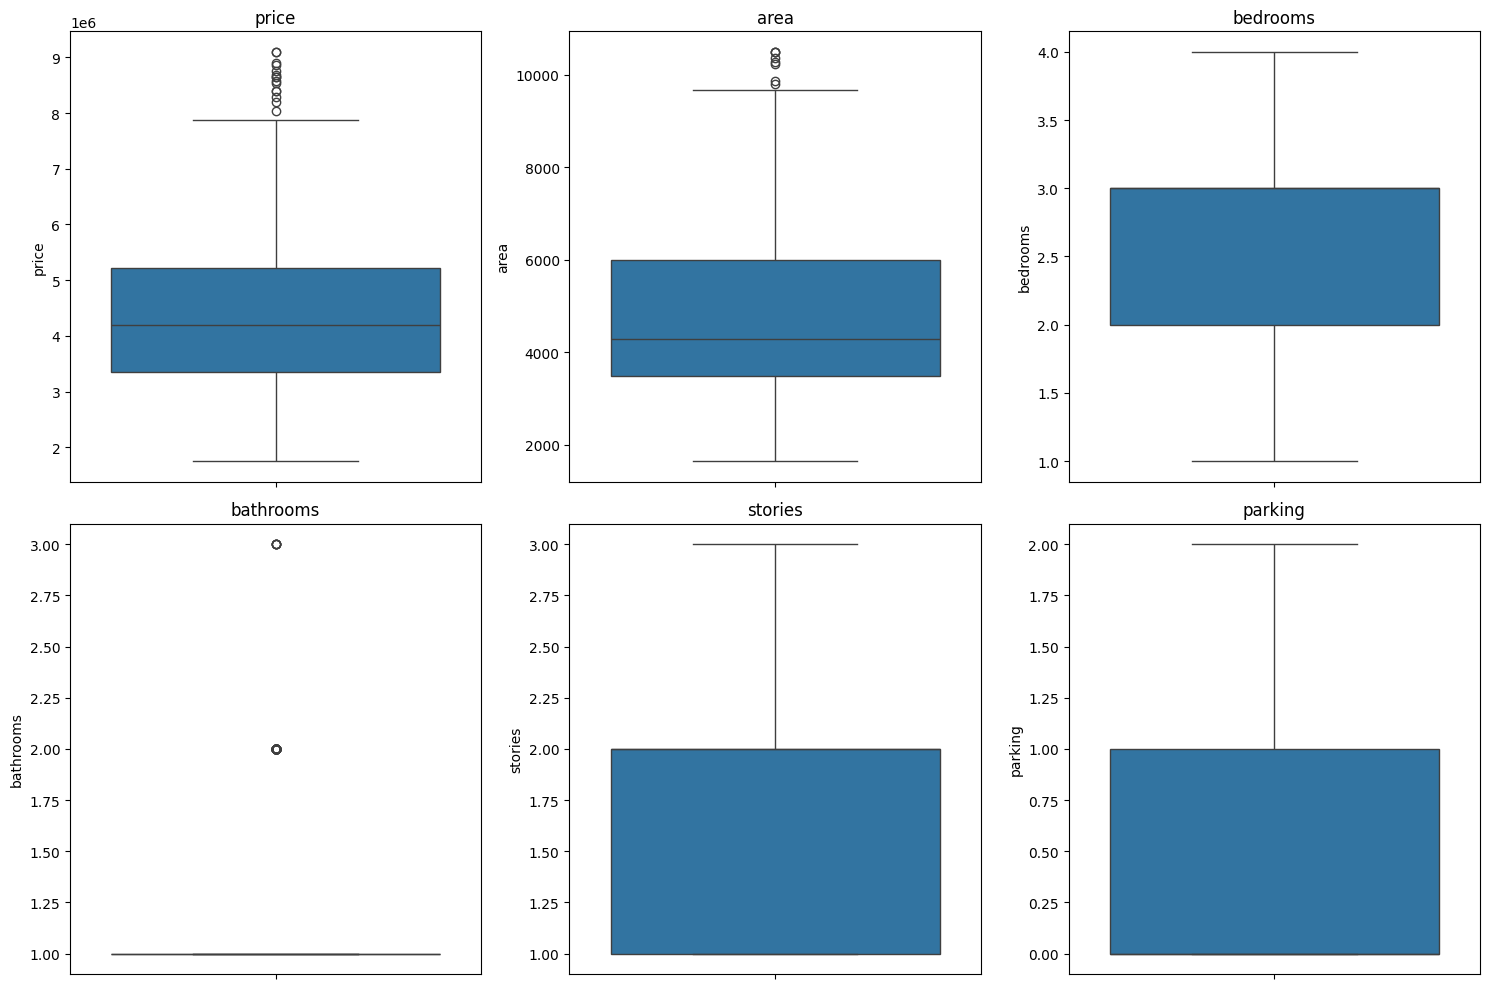

In [6]:
# Remove outliers
housing_clean = housing[outlier_mask]
print(f"Original shape: {housing.shape}")
print(f"Shape after removing outliers: {housing_clean.shape}")

# Show new data
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=housing_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
# Prepare features and target
X = housing_clean[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = housing_clean['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale target variable 
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()


In [9]:
X_train_scaled[0]

array([-0.42740077,  0.21459772, -0.50448858, -0.972637  , -0.72205424])

In [10]:
y_train_scaled[0]

-1.0891193690093683

In [11]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [12]:
# Make predictions on test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform predictions back to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)



Mean Squared Error: 1300994366728.0896
R² Score: 0.5003033894561831


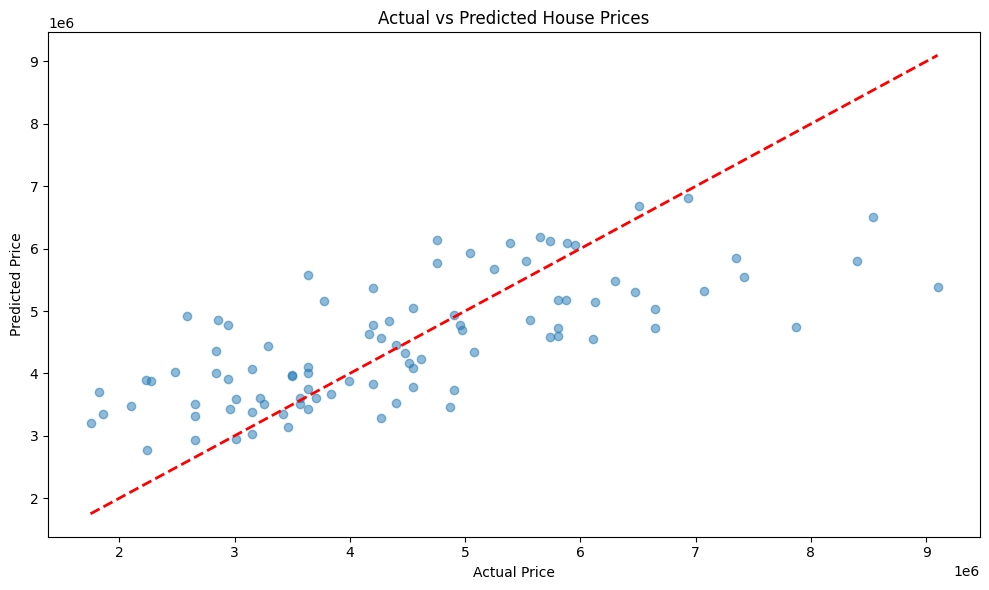


Model Coefficients:
     Feature  Coefficient
0       area     0.417700
1   bedrooms     0.056997
2  bathrooms     0.293678
3    stories     0.187767
4    parking     0.187755

Intercept: -1.449166069313867e-16


In [13]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

# Get feature names and coefficients for reporting
feature_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)
print("\nIntercept:", model.intercept_)

## Model Performance Metrics
- Mean Squared Error (MSE): 1300994366728.0896
- R² Score: 0.50

## Model Quality Analysis
1. **R² Score (0.50)**
   - The model explains only 50% of the variance in house prices
   - This indicates a moderate fit, suggesting that important factors might be missing


2. **Error Analysis**
   - The large MSE indicates significant prediction errors
   - The scatter plot shows considerable spread around the ideal prediction line

## Model Equation
The fitted linear model can be expressed as:

Price = -1.45e-16 + 0.418×area + 0.057×bedrooms + 0.294×bathrooms + 0.188×stories + 0.188×parking

## Feature Importance (based on standardized coefficients)
1. Area (0.418): Strongest positive impact
2. Bathrooms (0.294): Second most important feature
3. Stories (0.188): Moderate positive impact
4. Parking (0.188): Equal impact as stories
5. Bedrooms (0.057): Least influential among the features

## Interpretation
- The intercept is essentially zero (-1.45e-16), which is expected with standardized variables
- Area has the strongest influence on price, with a one standard deviation increase in area associated with a 0.418 standard deviation increase in price
- Surprisingly, number of bedrooms has relatively little impact on price compared to other features
- Bathrooms have more than 5 times the impact of bedrooms on price
- Stories and parking have identical impacts on price

## Task 2: Locally Weighted Linear Regression 

In [14]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
X = tips[["total_bill", "size"]].to_numpy()
y = tips["tip"].to_numpy()

In [16]:
def gaussian_kernel(x, x_i, tau=1.0):
    return np.exp(-np.sum((x - x_i) ** 2) / (2 * tau ** 2))

def locally_weighted_linear_regression(x_query, X, y, tau=1.0):
    m = X.shape[0]
    # Add bias term
    X_b = np.c_[np.ones(m), X]
    x_query_b = np.r_[1, x_query]
    
    # Calculate weights for each training example
    w = np.zeros(m)
    for i in range(m):
        w[i] = gaussian_kernel(x_query, X[i], tau)
    W = np.diag(w)
    
    # Calculate parameters
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    # Make prediction
    return x_query_b @ theta

In [17]:
def plot_regression_results(y, y_pred):
    # Calculate and print performance metrics
    mse = np.mean((y - y_pred) ** 2)
    r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Create visualization
    plt.figure(figsize=(12, 6))

    # Plot 1: Scatter plot of total bill vs tip with predicted values
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], y, alpha=0.5, label='Actual Tips')
    plt.scatter(X[:, 0], y_pred, alpha=0.5, label='Predicted Tips')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip Amount')
    plt.title('Tips vs Total Bill')
    plt.legend()

    # Plot 2: Scatter plot of party size vs tip with predicted values 
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 1], y, alpha=0.5, label='Actual Tips')
    plt.scatter(X[:, 1], y_pred, alpha=0.5, label='Predicted Tips')
    plt.xlabel('Party Size')
    plt.ylabel('Tip Amount')
    plt.title('Tips vs Party Size')
    plt.legend()

    plt.tight_layout()
    plt.show()


Mean Squared Error: 0.6120
R² Score: 0.6790


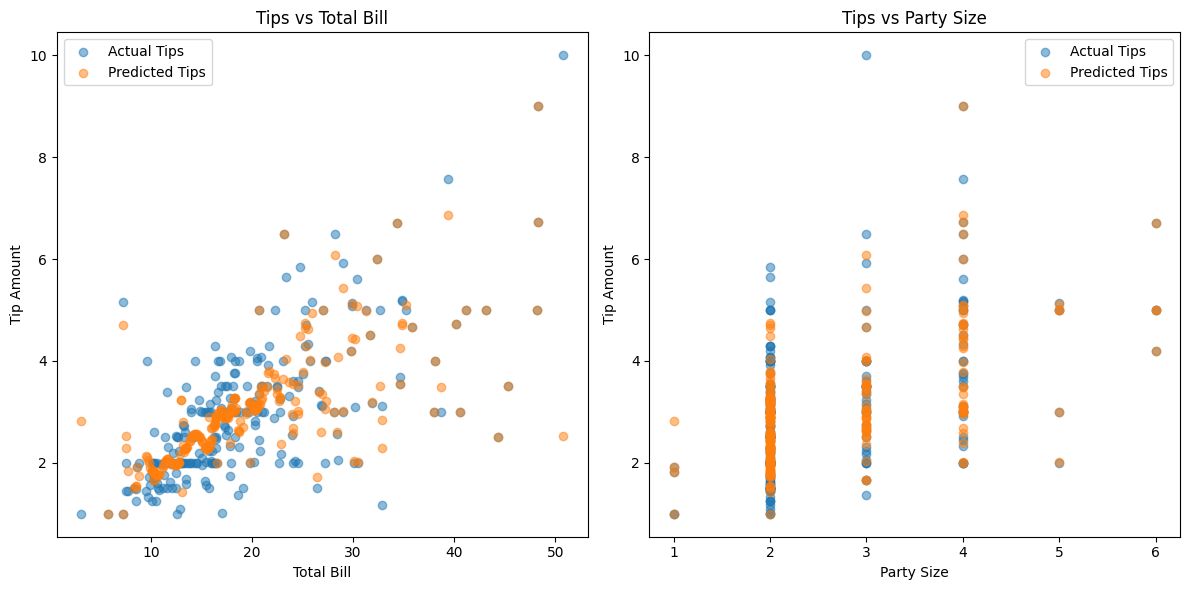

In [18]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=0.35)
plot_regression_results(y, y_pred)

Mean Squared Error: 0.4568
R² Score: 0.7604


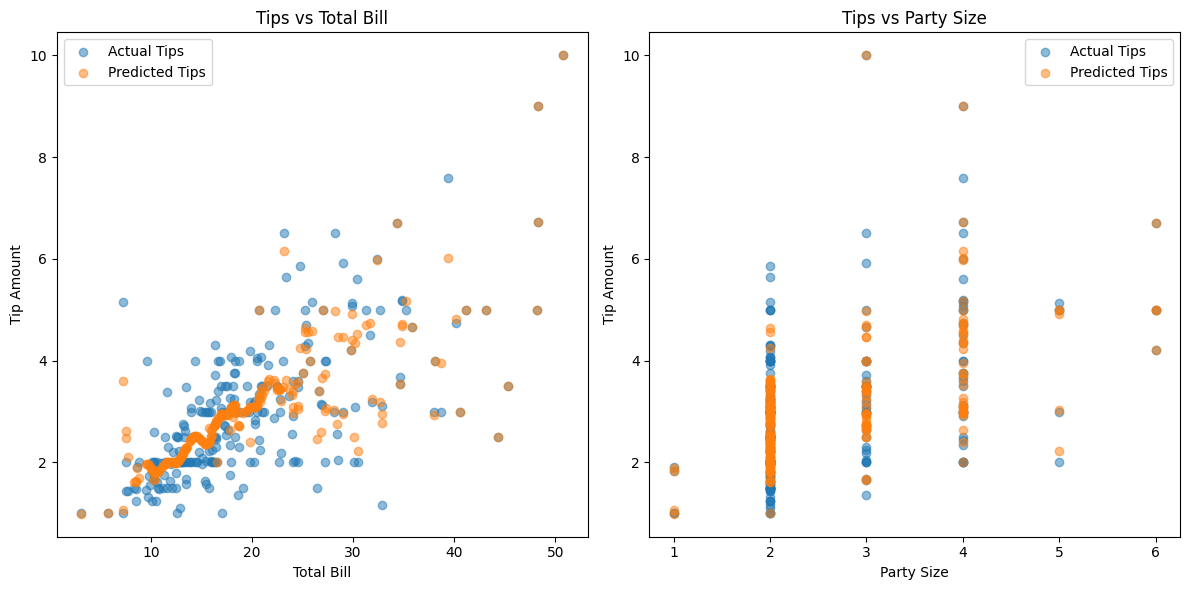

In [19]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=0.5)
plot_regression_results(y, y_pred)

Mean Squared Error: 0.6771
R² Score: 0.6449


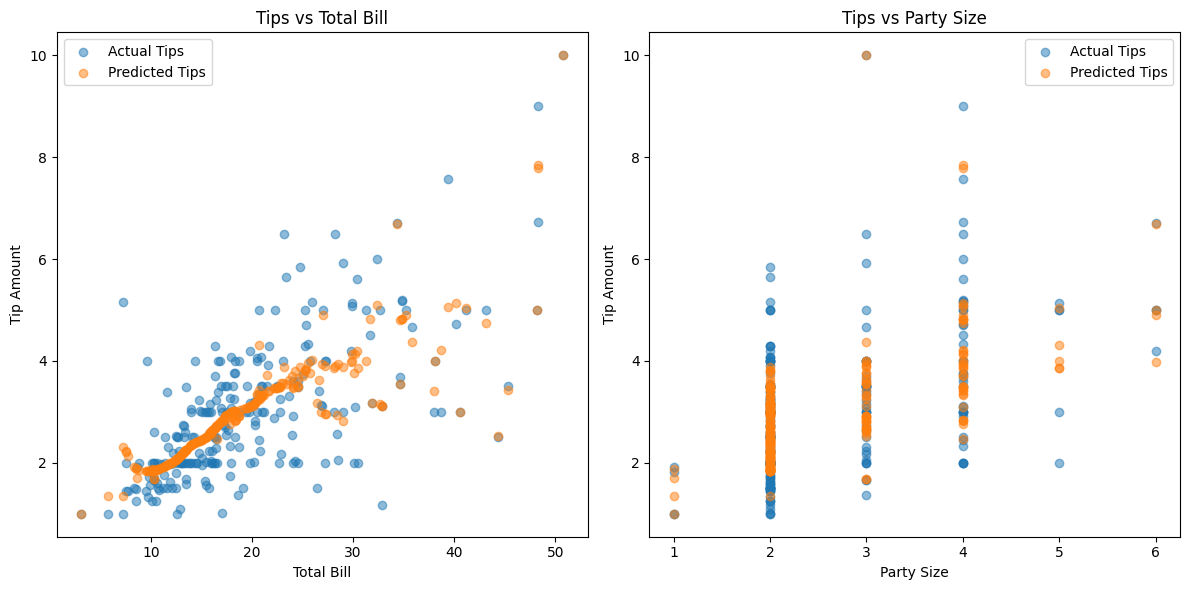

In [20]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=1)
plot_regression_results(y, y_pred)

Mean Squared Error: 0.7815
R² Score: 0.5901


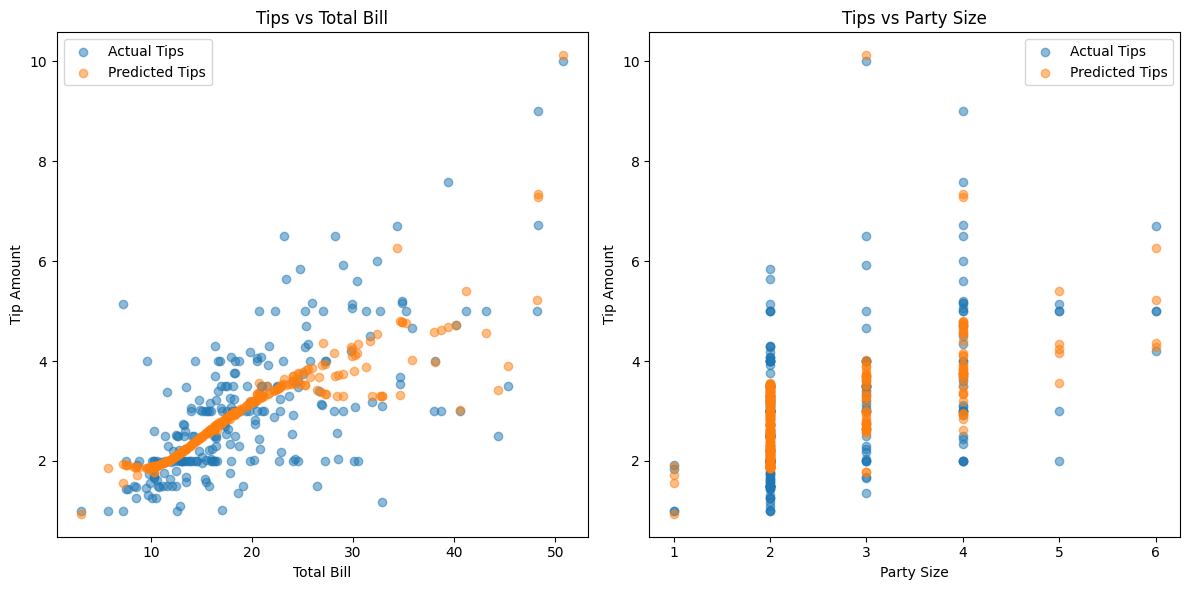

In [21]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=2)
plot_regression_results(y, y_pred)

Mean Squared Error: 0.8690
R² Score: 0.5442


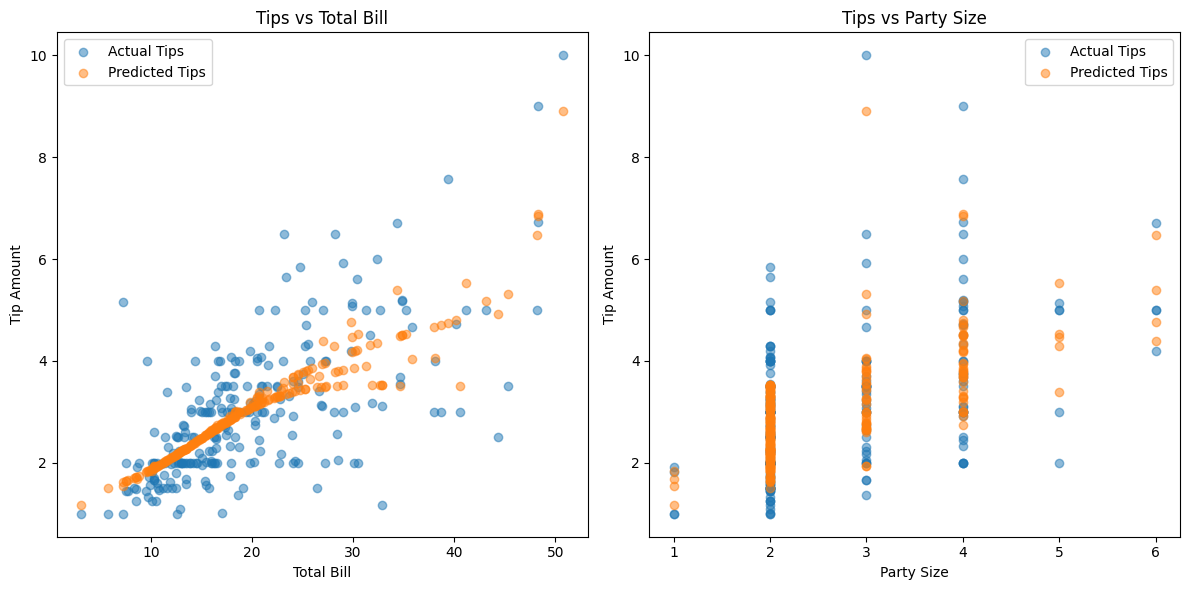

In [22]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=5)
plot_regression_results(y, y_pred)

Mean Squared Error: 0.9631
R² Score: 0.4949


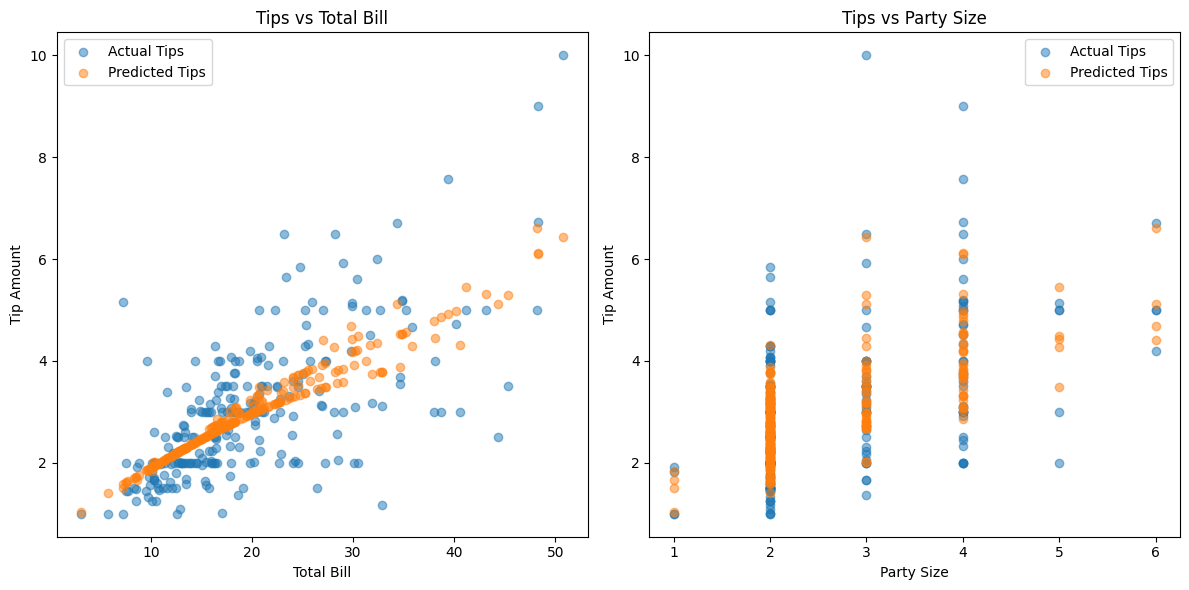

In [23]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=10)
plot_regression_results(y, y_pred)

Mean Squared Error: 1.0085
R² Score: 0.4711


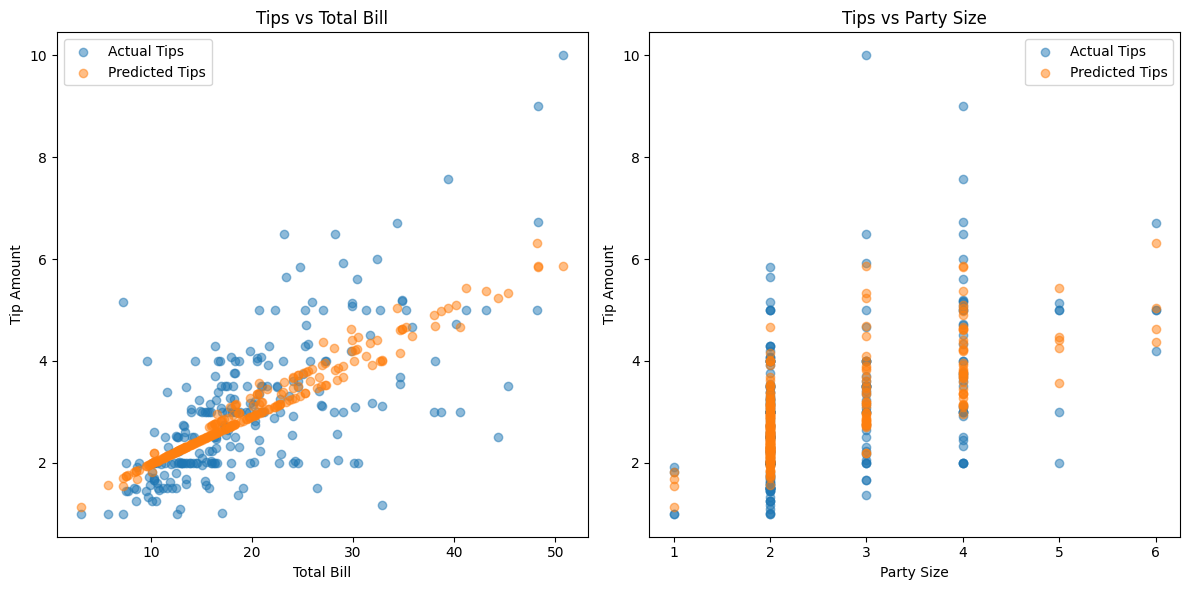

In [24]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=20)
plot_regression_results(y, y_pred)

Mean Squared Error: 1.0143
R² Score: 0.4680


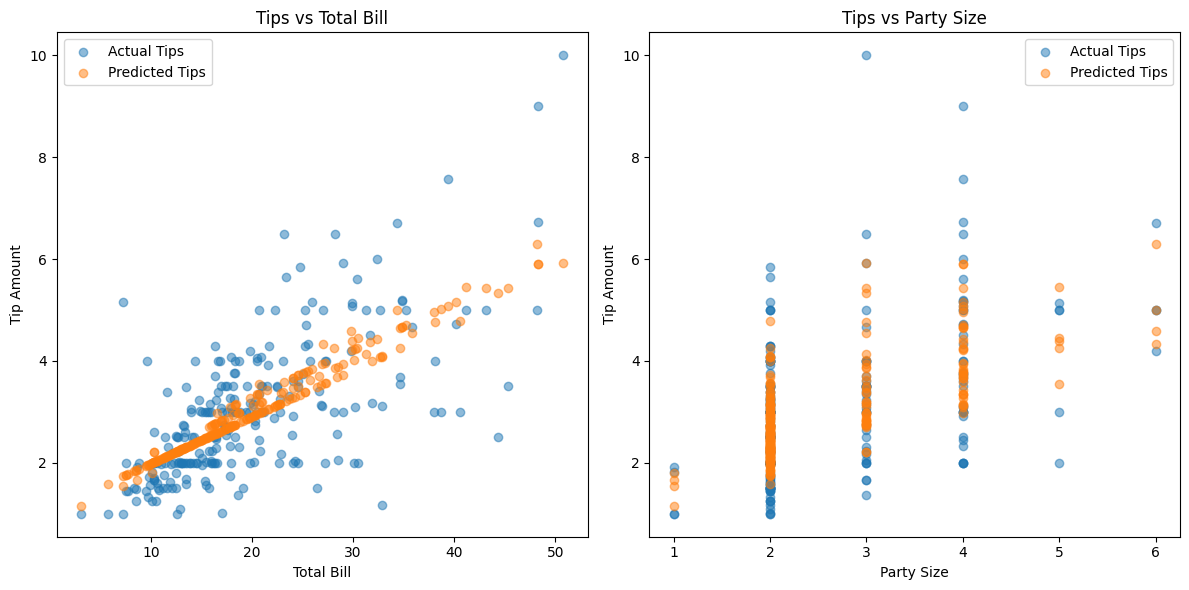

In [25]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=50)
plot_regression_results(y, y_pred)

Mean Squared Error: 1.0145
R² Score: 0.4679


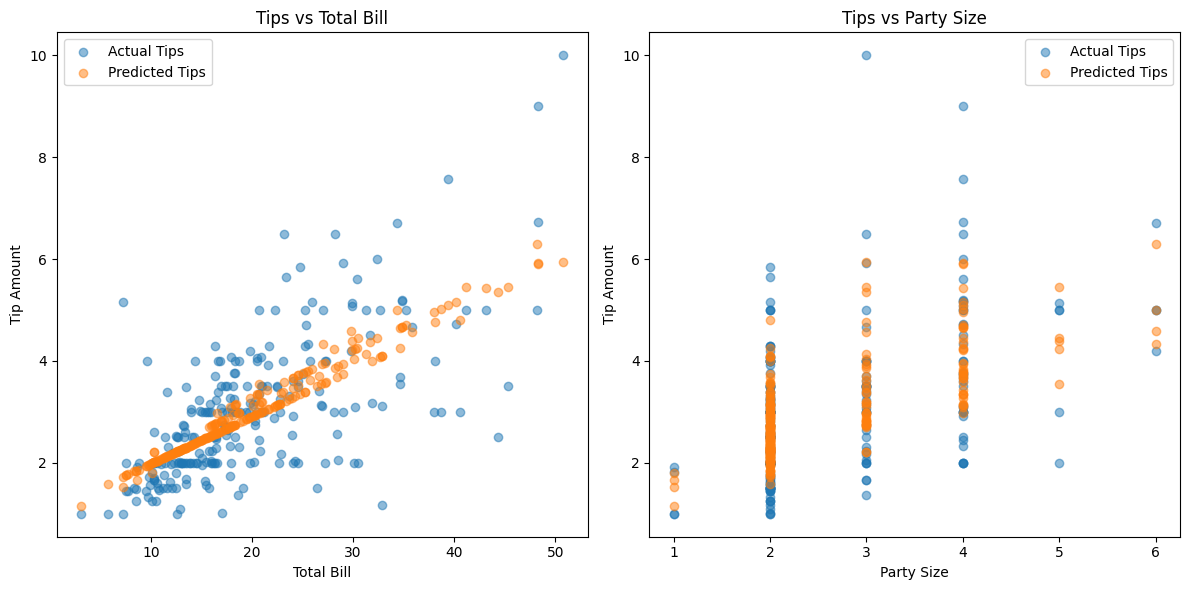

In [26]:
y_pred = np.zeros(len(X))
for i in range(len(X)):
    y_pred[i] = locally_weighted_linear_regression(X[i], X, y, tau=100)
plot_regression_results(y, y_pred)

### Different τ values

- With small τ values: The model is very sensitive to local variations, resulting in a more wiggly fit that closely follows individual data points. This can lead to overfitting.

- With medium τ values: The fit becomes smoother while still capturing the general non-linear trend in the data. This represents a good balance between bias and variance.

- With large τ values: The model becomes increasingly linear and less sensitive to local patterns. As τ approaches infinity, it essentially becomes equivalent to standard linear regression.

The choice of τ is thus crucial - too small leads to overfitting, while too large loses the benefit of local weighting.

###  Disadvantage of Locally Weighted Linear Regression

A major disadvantage of locally weighted linear regression compared to standard linear regression is computational efficiency. In standard linear regression, we compute the parameters once and can use them for all predictions. However, in locally weighted regression, we need to:

1. Compute weights for all training points
2. Fit a new weighted regression model
3. Make a single prediction

This process must be repeated for EACH new prediction point, making it computationally expensive especially with large datasets. The time complexity grows significantly with the size of the training data.


## Bonus Task: GD and SGD

In [27]:
# Load data for linear regression
data = pd.read_csv('penguins.csv')
# Remove rows with empty fields
data = data.dropna()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [28]:
# Define gradient descent functions
def gradient_descent(X, y, learning_rate=0.0001, n_iterations=1000, initial_weights=None, initial_bias=0):
    """
    Implements batch gradient descent for linear regression
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        Training data
    y : array-like of shape (n_samples,)
        Target values
    learning_rate : float, default=0.0001
        Step size for parameter updates
    n_iterations : int, default=1000
        Number of iterations to run
    initial_weights : array of shape (n_features,), default=None
        Initial weights to start from. If None, initialized to zeros.
    initial_bias : float, default=0
        Initial bias to start from
        
    Returns:
    --------
    weights : array of shape (n_features,)
        Optimal weights found
    bias : float
        Optimal bias found
    losses : array of shape (n_iterations,)
        Loss values at each iteration
    """
    # Initialize parameters
    weights = initial_weights if initial_weights is not None else np.zeros(X.shape[1])
    bias = initial_bias
    n_samples = X.shape[0]
    losses = np.zeros(n_iterations)
    
    # Gradient descent iterations
    for i in range(n_iterations):
        # Forward pass
        y_pred = np.dot(X, weights) + bias
        
        # Compute gradients
        dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
        db = (2/n_samples) * np.sum(y_pred - y)
        
        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute and store loss
        losses[i] = np.mean((y_pred - y)**2)
        
    return weights, bias, losses

In [29]:
def stochastic_gradient_descent(X, y, learning_rate=0.0001, n_iterations=1000):
    """
    Implements stochastic gradient descent for linear regression
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        Training data
    y : array-like of shape (n_samples,)
        Target values
    learning_rate : float, default=0.0001
        Step size for parameter updates
    n_iterations : int, default=1000
        Number of iterations to run
        
    Returns:
    --------
    weights : array of shape (n_features,)
        Optimal weights found
    bias : float
        Optimal bias found
    losses : array of shape (n_iterations,)
        Loss values at each iteration
    """
    # Initialize parameters
    weights = np.zeros(X.shape[1])
    bias = 0
    n_samples = X.shape[0]
    losses = np.zeros(n_iterations)
    
    # SGD iterations
    for i in range(n_iterations):
        # Randomly select one sample
        idx = np.random.randint(n_samples)
        xi = X[idx:idx+1]
        yi = y[idx:idx+1]
        
        # Forward pass
        y_pred = np.dot(xi, weights) + bias
        
        # Compute gradients
        dw = 2 * np.dot(xi.T, (y_pred - yi))
        db = 2 * np.sum(y_pred - yi)
        
        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute and store loss for all samples
        y_pred_all = np.dot(X, weights) + bias
        losses[i] = np.mean((y_pred_all - y)**2)
        
    return weights, bias, losses

In [30]:
# Prepare data
X = data['flipper_length_mm'].values.reshape(-1, 1)
y = data['body_mass_g'].values

# Scale features for better convergence
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [31]:
# Run GD and SGD
gd_weights, gd_bias, gd_losses = gradient_descent(X, y, learning_rate=0.1, n_iterations=1000)
sgd_weights, sgd_bias, sgd_losses = stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000)

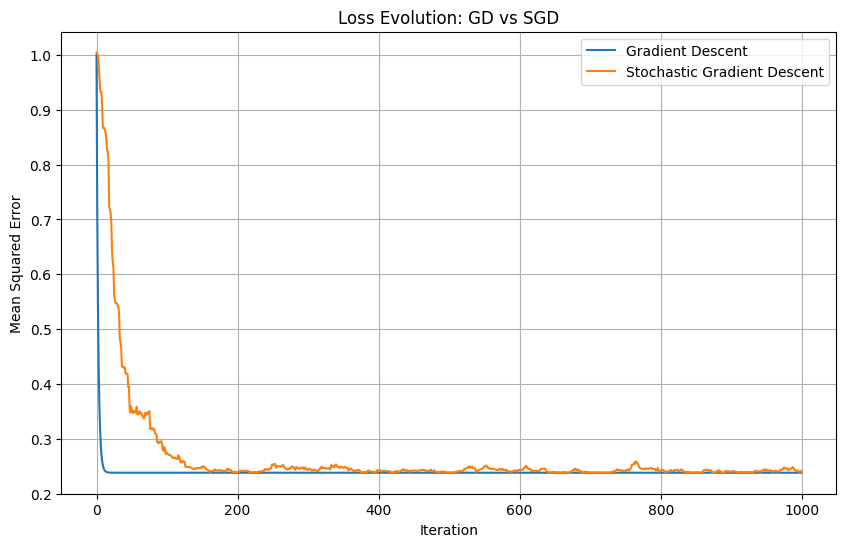

Final MSE (Gradient Descent): 0.237908
Final MSE (Stochastic Gradient Descent): 0.241038


In [32]:
# Plot loss evolution
plt.figure(figsize=(10, 6))
plt.plot(gd_losses, label='Gradient Descent')
plt.plot(sgd_losses, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Evolution: GD vs SGD')
plt.legend()
plt.grid(True)
plt.show()

# Calculate final MSE for both methods
y_pred_gd = np.dot(X, gd_weights) + gd_bias
y_pred_sgd = np.dot(X, sgd_weights) + sgd_bias

print(f"Final MSE (Gradient Descent): {np.mean((y_pred_gd - y)**2):.6f}")
print(f"Final MSE (Stochastic Gradient Descent): {np.mean((y_pred_sgd - y)**2):.6f}")


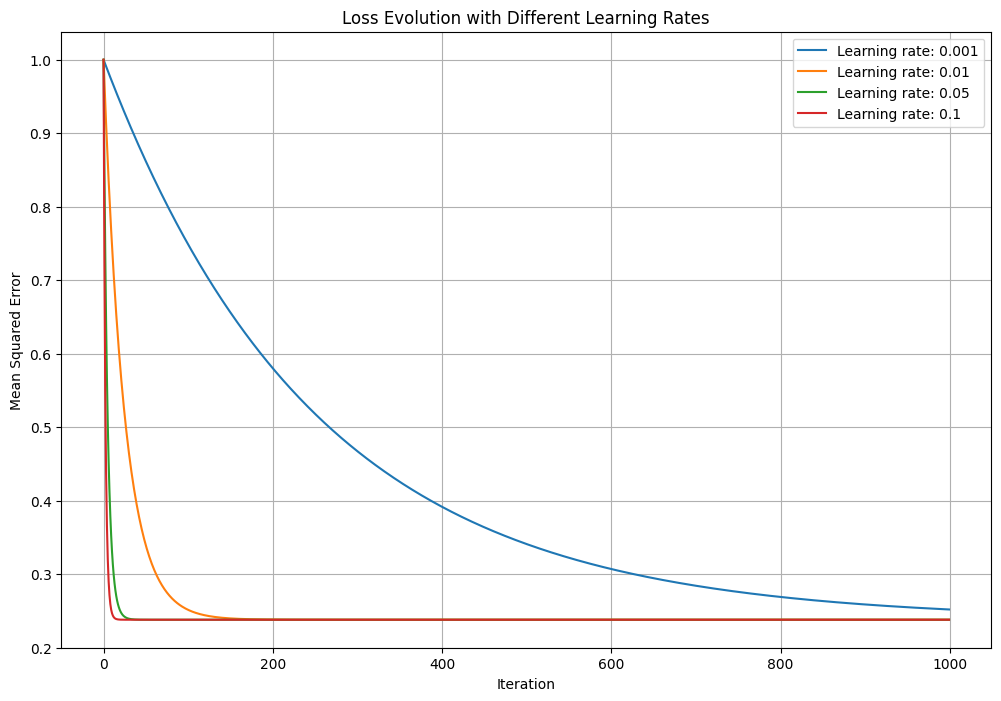

In [33]:
# Try different learning rates
learning_rates = [0.001, 0.01, 0.05, 0.1]
initial_weights = [-1.0, 0.0, 1.0]  # Different initial weights to try

plt.figure(figsize=(12, 8))

# Test different learning rates
for lr in learning_rates:
    _, _, losses = gradient_descent(X, y, learning_rate=lr, n_iterations=1000)
    plt.plot(losses, label=f'Learning rate: {lr}')

plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Evolution with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

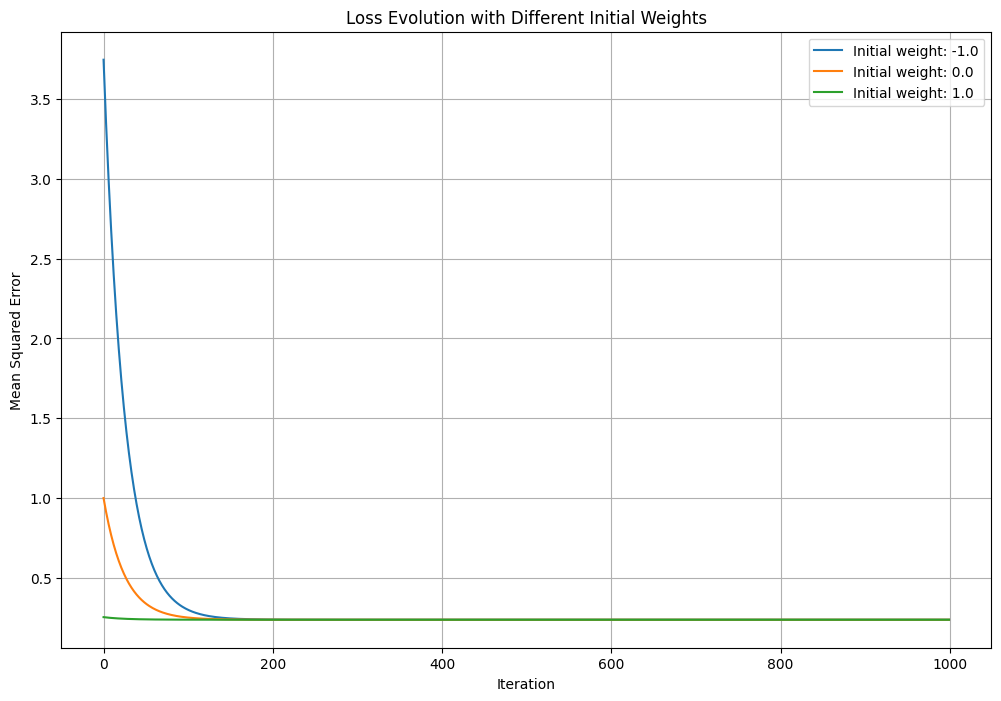

In [34]:
# Test different initial weights
plt.figure(figsize=(12, 8))
for init_weight in initial_weights:
    # Initialize weights with the specified value
    weights = np.array([init_weight])
    bias = 0
    
    # Run gradient descent with custom initialization
    _, _, losses = gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, 
                                  initial_weights=weights, initial_bias=bias)
    plt.plot(losses, label=f'Initial weight: {init_weight}')

plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Evolution with Different Initial Weights')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Print final MSE for each configuration
print("\nFinal MSE for different learning rates:")
for lr in learning_rates:
    weights, bias, losses = gradient_descent(X, y, learning_rate=lr, n_iterations=1000)
    y_pred = np.dot(X, weights) + bias
    print(f"Learning rate {lr}: {np.mean((y_pred - y)**2):.6f}")

print("\nFinal MSE for different initial weights:")
for init_weight in initial_weights:
    weights = np.array([init_weight])
    final_weights, final_bias, losses = gradient_descent(X, y, learning_rate=0.01, n_iterations=1000,
                                                       initial_weights=weights, initial_bias=0)
    y_pred = np.dot(X, final_weights) + final_bias
    print(f"Initial weight {init_weight}: {np.mean((y_pred - y)**2):.6f}")



Final MSE for different learning rates:
Learning rate 0.001: 0.251810
Learning rate 0.01: 0.237908
Learning rate 0.05: 0.237908
Learning rate 0.1: 0.237908

Final MSE for different initial weights:
Initial weight -1.0: 0.237908
Initial weight 0.0: 0.237908
Initial weight 1.0: 0.237908


## Loss Function and Observations

The Mean Squared Error (MSE) loss function used in this implementation is:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

where:
- $n$ is the number of samples
- $y_i$ is the actual target value
- $\hat{y}_i$ is the predicted value

## Observations on GD vs SGD:

Based on the experiments with different learning rates and initial weights:

1. Gradient Descent (GD) showed more stable convergence compared to Stochastic Gradient Descent (SGD), but at the cost of slower training time since it uses the entire dataset for each update.

2. The learning rate significantly impacted convergence:
   - Higher learning rates (0.1) led to faster initial descent but risked overshooting(not showing here because data is too simple)
   - Lower learning rates (0.001) provided more stable but slower convergence

3. Different initial weights affected the convergence path but generally reached similar final MSE values, demonstrating the robustness of the algorithm.

